<a href="https://colab.research.google.com/github/mariusel991/UPT/blob/main/PI/Lab/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import torch
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(42)
np.random.seed(42)

In [82]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    #X = torch.normal(-3, 3, (num_examples, len(w)))
    X =  torch.arange(-3,3,0.1).reshape(60,1)

    y = X @ w + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape(-1, 1)

true_w = torch.tensor([1.0])
true_b = -1.0
features, labels = synthetic_data(true_w, true_b, 60)

In [83]:
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = torch.utils.data.TensorDataset(*data_arrays)
    return torch.utils.data.DataLoader(dataset, batch_size, shuffle=is_train)

In [84]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

print('Features:', features[0], '\nLabel:', labels[0])

Features: tensor([-3.]) 
Label: tensor([-3.9888])


In [85]:
from torch import nn

net = nn.Sequential(nn.Linear(1, 1))

net[0].weight.data.normal_(1)
net[0].bias.data.fill_(1)

loss = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.05)

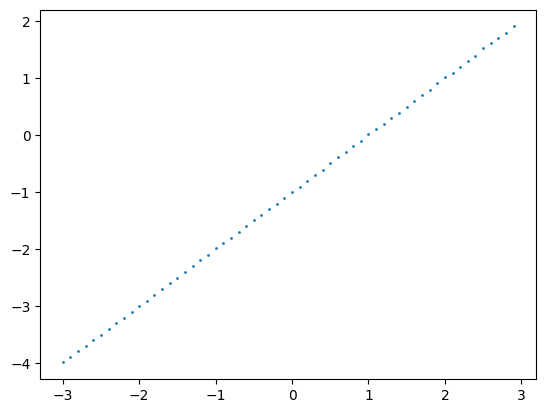

In [86]:
plt.scatter(features[:, 0].detach().numpy(), labels.detach().numpy(), s=1)
plt.show()

In [87]:
num_epochs = 25
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        #optimizer.zero_grad()
        w = net[0].weight.data
        b = net[0].bias.data

        l.backward()
        #optimizer.step()

        vWL = net[0].weight.grad.data
        vBL = net[0].bias.grad.data

        net[0].weight.data -= 0.05 * net[0].weight.grad.data
        net[0].bias.data -= 0.05 * net[0].bias.grad.data

        net[0].weight.grad.data.zero_()
        net[0].bias.grad.data.zero_()
    l = loss(net(features), labels)
    print(f'Epoch {epoch + 1}, Loss {l:f}')


print()
w = net[0].weight.data
print('Error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('Error in estimating b:', true_b - b)

print('Actual w:', true_w)
print('Predicted w:',w)
print('Actual b:',true_b)
print('Predicetd b:',b)

Epoch 1, Loss 1.103267
Epoch 2, Loss 0.305285
Epoch 3, Loss 0.085478
Epoch 4, Loss 0.024021
Epoch 5, Loss 0.006680
Epoch 6, Loss 0.001897
Epoch 7, Loss 0.000590
Epoch 8, Loss 0.000211
Epoch 9, Loss 0.000111
Epoch 10, Loss 0.000082
Epoch 11, Loss 0.000074
Epoch 12, Loss 0.000071
Epoch 13, Loss 0.000071
Epoch 14, Loss 0.000070
Epoch 15, Loss 0.000070
Epoch 16, Loss 0.000070
Epoch 17, Loss 0.000070
Epoch 18, Loss 0.000070
Epoch 19, Loss 0.000070
Epoch 20, Loss 0.000070
Epoch 21, Loss 0.000070
Epoch 22, Loss 0.000070
Epoch 23, Loss 0.000070
Epoch 24, Loss 0.000070
Epoch 25, Loss 0.000070

Error in estimating w: tensor([0.0013])
Error in estimating b: tensor([0.0008])
Actual w: tensor([1.])
Predicted w: tensor([[0.9987]])
Actual b: -1.0
Predicetd b: tensor([-1.0008])
